Auteur : Antoine Chesnais  
Date dernière version : 28/10/2019  
Description : Ce notebook contient l'assemblage des données Olist en un dataset customer / orders   
Librairies utilisées : Pandas, Numpy, Matplolib, Seaborn

Ce notebook permet l'assemblage des différentes databases Olist en une seule, aggrégeant les données au niveau du client et donnant des informations au niveau de la commande. Une succinte EDA est effectuée à chaque chargement d'un set de données pour mieux l'appréhender.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données</a></span><ul class="toc-item"><li><span><a href="#Géolocalisation" data-toc-modified-id="Géolocalisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Géolocalisation</a></span></li><li><span><a href="#Clients-:" data-toc-modified-id="Clients-:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clients :</a></span></li><li><span><a href="#Vendeurs-:" data-toc-modified-id="Vendeurs-:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Vendeurs :</a></span></li><li><span><a href="#Objets-commandés-:" data-toc-modified-id="Objets-commandés-:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Objets commandés :</a></span></li><li><span><a href="#Description-produit" data-toc-modified-id="Description-produit-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Description produit</a></span></li><li><span><a href="#Traduction-catégorie-produit" data-toc-modified-id="Traduction-catégorie-produit-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Traduction catégorie produit</a></span></li><li><span><a href="#Commandes" data-toc-modified-id="Commandes-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Commandes</a></span></li><li><span><a href="#Paiements" data-toc-modified-id="Paiements-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Paiements</a></span></li><li><span><a href="#Commentaires" data-toc-modified-id="Commentaires-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Commentaires</a></span></li></ul></li><li><span><a href="#Création-BDD-clients-/-commandes" data-toc-modified-id="Création-BDD-clients-/-commandes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Création BDD clients / commandes</a></span><ul class="toc-item"><li><span><a href="#Ajout-des-données-de-paiements" data-toc-modified-id="Ajout-des-données-de-paiements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ajout des données de paiements</a></span></li><li><span><a href="#Selection-de-features-et-aggrégation-par-client" data-toc-modified-id="Selection-de-features-et-aggrégation-par-client-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Selection de features et aggrégation par client</a></span><ul class="toc-item"><li><span><a href="#Transformation-de-la-date-d'achat-en-délais-depuis-l'achat" data-toc-modified-id="Transformation-de-la-date-d'achat-en-délais-depuis-l'achat-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Transformation de la date d'achat en délais depuis l'achat</a></span></li><li><span><a href="#Transformation-des-données-sur-les-modes-de-paiements" data-toc-modified-id="Transformation-des-données-sur-les-modes-de-paiements-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Transformation des données sur les modes de paiements</a></span></li></ul></li><li><span><a href="#Modification-des-noms-des-variables" data-toc-modified-id="Modification-des-noms-des-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Modification des noms des variables</a></span></li><li><span><a href="#Enregistrement-du-dataset" data-toc-modified-id="Enregistrement-du-dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Enregistrement du dataset</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Afin de pouvoir définir une notion de temporalité dans le dataset, on se placera à la date du 1er Novembre 2018, mois à partir duquel nous n'avons plus de données.

In [2]:
ref_date = pd.Timestamp('2018-11-01T00')
display(ref_date)

Timestamp('2018-11-01 00:00:00')

# Chargement des données

## Géolocalisation

In [3]:
data_geo = pd.read_csv('olist_geolocation_dataset.csv')
print(data_geo.shape)
display(data_geo.head())

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Clients :

In [4]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
print(data_customers.shape)
display(data_customers.head())

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print(data_customers['customer_id'].value_counts().describe())

count    99441.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: customer_id, dtype: float64


In [6]:
print(data_customers['customer_unique_id'].value_counts().describe())

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: customer_unique_id, dtype: float64


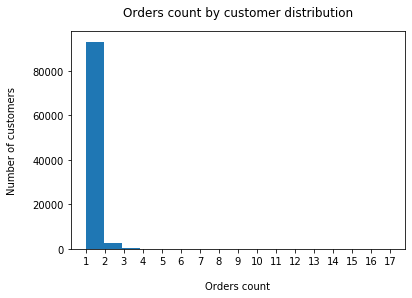

In [60]:
fig, ax = plt.subplots()
data_customers['customer_unique_id'].value_counts().hist(bins=17)
ax.set_xlabel('Orders count', labelpad=15)
ax.set_ylabel('Number of customers', labelpad=15)
ax.set_title('Orders count by customer distribution', pad=15)
ax.set_xticks(range(1,18))
ax.grid(False)

Attention : 'customer id' est unique pour chaque commande, il faut utiliser 'customer_unique_id' pour se référer au client  
Au final une majorité des clients n'a passé qu'une seule commande

Text(0.5, 1.0, 'Number of customers by state')

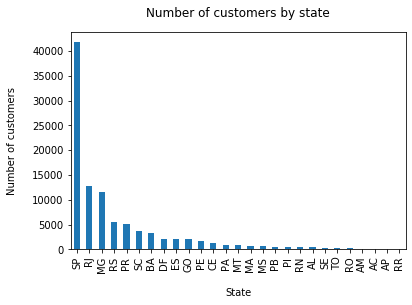

In [68]:
fig, ax = plt.subplots()
data_customers['customer_state'].value_counts().plot.bar()
ax.set_xlabel('State', labelpad=15)
ax.set_ylabel('Number of customers', labelpad=15)
ax.set_title('Number of customers by state', pad=15)

## Vendeurs :

In [9]:
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
print(data_sellers.shape)
display(data_sellers.head())

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


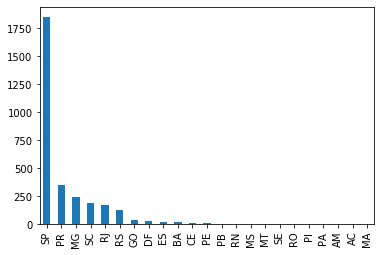

In [10]:
data_sellers['seller_state'].value_counts().plot.bar()

## Objets commandés :

In [11]:
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
print(data_order_items.shape)
display(data_order_items.head())

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


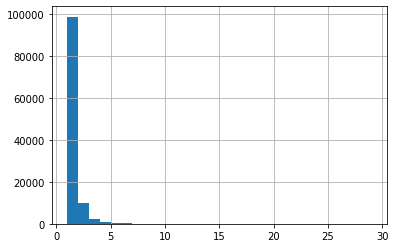

In [12]:
data_order_items['order_item_id'].hist(bins=range(1,30))

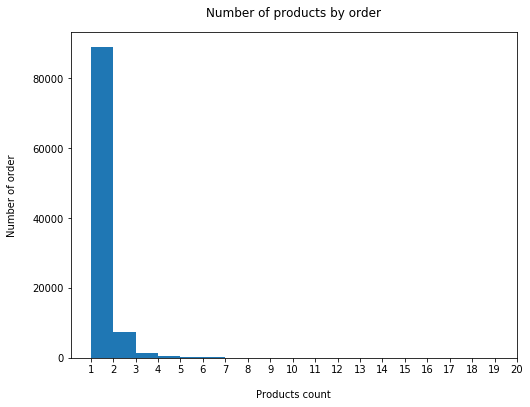

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
data_order_items['order_id'].value_counts().hist(bins=range(1,20), ax=ax)
ax.set_xlabel('Products count', labelpad=15)
ax.set_ylabel('Number of order', labelpad=15)
ax.set_title('Number of products by order', pad=15)
ax.set_xticks(range(1,21))
ax.grid(False)

Beaucoup de commandes mono produit

In [14]:
data_order_items.drop(labels=['order_item_id','shipping_limit_date'], axis=1, inplace=True)

Text(0.5, 1.0, 'Sold products prices distribution')

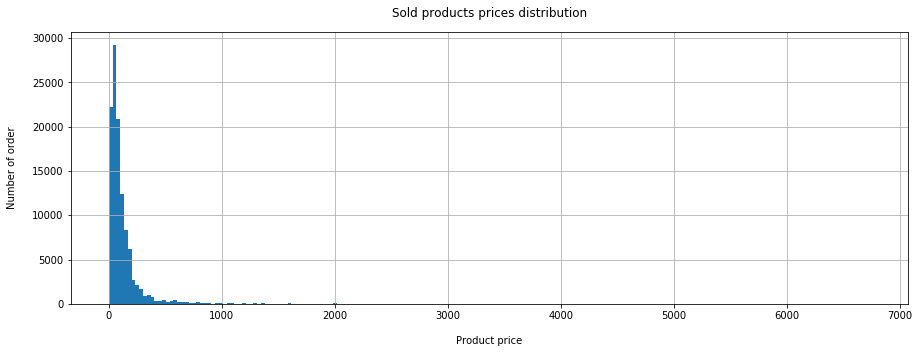

In [55]:
fig, ax = plt.subplots()
data_order_items['price'].hist(bins=200, figsize=(15,5), ax=ax)
ax.set_xlabel('Product price', labelpad=15)
ax.set_ylabel('Number of order', labelpad=15)
ax.set_title('Sold products prices distribution', pad=15)

Distribution des prix des objets vendus très écrasées vers les faibles valeurs, forte présence d'outliers

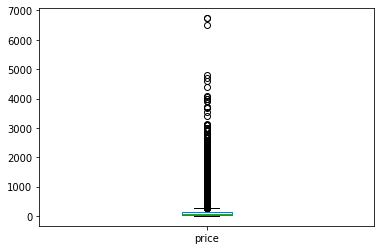

In [16]:
data_order_items['price'].plot.box()

In [17]:
data_order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

## Description produit

In [18]:
data_products = pd.read_csv('olist_products_dataset.csv')
print(data_products.shape)
display(data_products.head())

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
data_products.drop(labels=['product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                           'product_name_lenght', 'product_description_lenght','product_photos_qty'], 
                   axis=1, inplace=True)

## Traduction catégorie produit

In [20]:
data_trad = pd.read_csv('product_category_name_translation.csv')
print(data_trad.shape)
display(data_trad.head())

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [21]:
data_products = data_products.merge(right=data_trad, how='left', on='product_category_name')
print(data_products.shape)
display(data_products.head())
data_products.drop(labels=['product_category_name'], axis=1, inplace=True)

(32951, 3)


,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


Text(0.5, 1.0, 'Proportion of product sold by category')

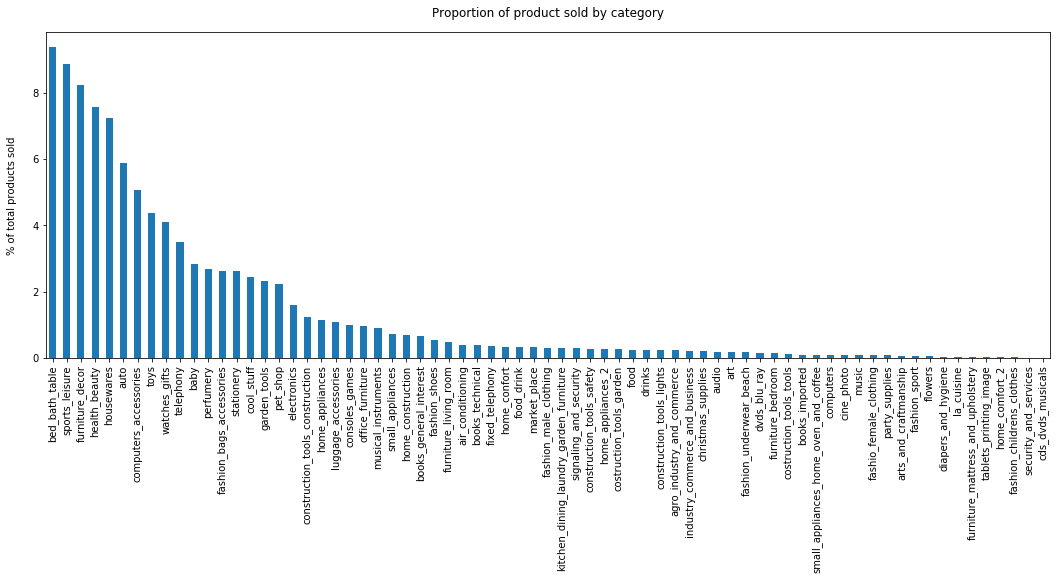

In [72]:
volume_products = data_products['product_category_name_english'].value_counts()
volume_products = volume_products / volume_products.sum() * 100
fig, ax = plt.subplots()
volume_products.plot.bar(figsize=(18,6))
ax.set_ylabel('% of total products sold', labelpad=15)
ax.set_title('Proportion of product sold by category', pad=15)

A diviser en 5 grandes catégories ?

## Commandes

In [23]:
data_orders = pd.read_csv('olist_orders_dataset.csv')
print(data_orders.shape)
display(data_orders.head())

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
data_orders.drop(labels=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'], 
                 axis=1, inplace=True)

In [25]:
data_orders.order_purchase_timestamp =  pd.to_datetime(data_orders.order_purchase_timestamp, 
                                                       format = '%Y/%m/%d %H:%M:%S')

In [26]:
monthly_view = data_orders['order_purchase_timestamp'].dt.to_period('M')

Text(0.5, 1.0, 'Number of orders by month')

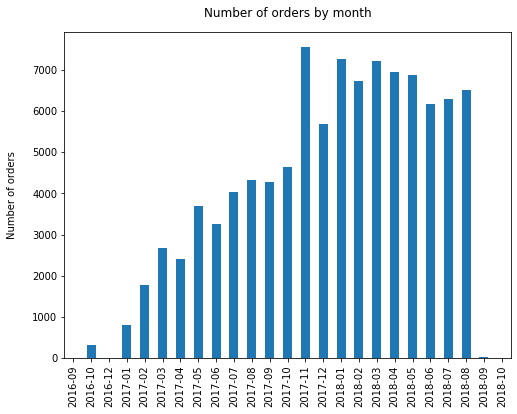

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
monthly_view.value_counts().sort_index().plot.bar(ax=ax)
ax.set_ylabel('Number of orders', labelpad=15)
ax.set_title('Number of orders by month', pad=15)

## Paiements

In [29]:
data_payments = pd.read_csv('olist_order_payments_dataset.csv')
print(data_payments.shape)
display(data_payments.head())

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Attention : plus de paiements que de commandes !

In [30]:
display(data_payments['payment_type'].value_counts())

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [31]:
data_payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [32]:
data_payments.loc[:, ['payment_type','payment_installments']].groupby('payment_type').mean()

,payment_installments
payment_type,
boleto,1.000000
credit_card,3.507155
debit_card,1.000000
not_defined,1.000000
voucher,1.000000


Seul le moyen de paiement 'credit_card' présente un étalement des paiements.

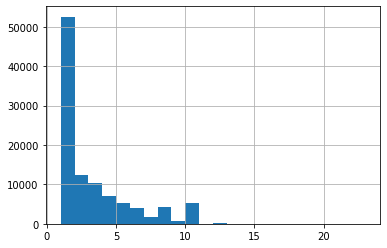

In [33]:
data_payments['payment_installments'].hist(bins=range(1,24))

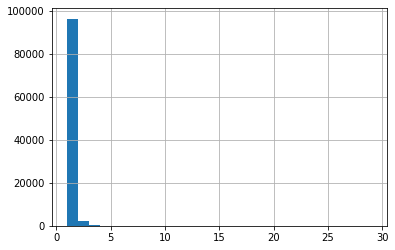

In [34]:
data_payments['order_id'].value_counts().hist(bins=range(1,30))

Majorité des paiements fait en une seule fois.

In [35]:
display(data_payments.loc[data_payments['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


## Commentaires

In [36]:
data_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
print(data_reviews.shape)
display(data_reviews.head())

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [37]:
data_reviews.drop(labels=['review_comment_title','review_comment_message',
                          'review_answer_timestamp'], axis=1, inplace=True)

Attention : plus de commentaires que de commandes ! Mais néanmoins moins que de le nombre de produits commandés. Le problème réside dans le fait que le lien soit fait par customer id. Faire un groupby préalable par order id.

In [38]:
data_reviews.review_creation_date =  pd.to_datetime(data_reviews.review_creation_date, 
                                                       format = '%Y/%m/%d %H:%M:%S')

In [39]:
monthly_review = pd.DataFrame(data_reviews['review_creation_date'].dt.to_period('M'))

In [40]:
monthly_review['review_score'] = data_reviews['review_score'].copy()
grouped_monthly_review = monthly_review.groupby(['review_creation_date'])['review_score'].apply(lambda x: x.value_counts())
display(grouped_monthly_review)

review_creation_date   
2016-10               5     106
                      4      31
                      1      26
                      3      14
                      2       4
                           ... 
2018-08               5    5560
                      4    1700
                      1     871
                      3     650
                      2     257
Name: review_score, Length: 114, dtype: int64

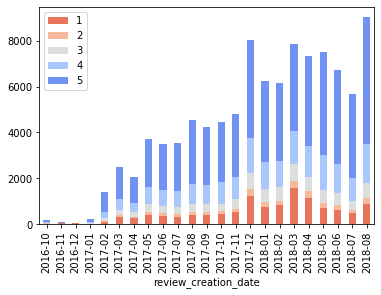

In [41]:
grouped_monthly_review.unstack().plot(kind='bar', stacked=True, color=sns.color_palette("coolwarm_r", 5))

La proportion des différentes notes semble conservées d'un mois sur l'autre, quel que soit le nombre de commandes.

In [42]:
data_reviews['review_id'].nunique()

99173

In [43]:
data_reviews['order_id'].nunique()

99441

In [44]:
data_reviews.loc[data_reviews['order_id'].duplicated(keep=False)]

,review_id,order_id,review_score,review_creation_date
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18
346,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,2018-03-04
500,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2,2017-12-28
767,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5,2017-08-08
781,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3,2017-10-22
...,...,...,...,...
99762,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,2018-02-17
99883,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,2017-07-03
99939,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,2018-03-03
99953,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,2017-05-24


In [45]:
display(data_reviews.loc[data_reviews['order_id']=='3e93213bb8fdda91186b4018b2fe0030'])

,review_id,order_id,review_score,review_creation_date
5624,7168439a7228c5684a494116c1c8da5f,3e93213bb8fdda91186b4018b2fe0030,5,2018-07-24
99974,40743b46a0ee86375cedb95e82b78d75,3e93213bb8fdda91186b4018b2fe0030,5,2018-08-08


Problème : un même review id peut être associé à plusieurs commandes, et une commande peut avoir plusieurs 'review_id'. Apparememment on devrait avoir un seul commentaire par commande (enquête envoyée à la date de réception prévue de la commande ?). Le problème a été abordé sur kaggle par une autre personne mais pas de réponse. On supprimera les doublons sur les commandes.

In [46]:
data_reviews.drop_duplicates(subset=['order_id'], inplace=True)

In [47]:
display(data_reviews.shape)

(99441, 4)

# Création BDD clients / commandes

Dans un premier temps on associe aux commandes les clients correspondants.

In [124]:
BDD_customers_orders = data_orders.merge(right=data_customers, how='inner', on='customer_id')
print(BDD_customers_orders.shape)
display(BDD_customers_orders.head())

(99441, 9)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Dans un second temps on ajoute les retours effectués par les clients sur la commande correspondante.

In [125]:
BDD_customers_orders = BDD_customers_orders.merge(right=data_reviews, how='inner', on='order_id')
print(BDD_customers_orders.shape)
display(BDD_customers_orders.head())

(99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17


## Ajout des données de paiements

Il faut ensuite ajouter les données de paiements. Les données de paiements sont au préalable à aggréger au niveau de la commande et du moyen de paiement, car plusieurs moyens de paiements peuvent être utilisés. Pour 'payment_installments' on prendra le maximum, car l'on a vu que seule la 'credit_card' possède cette option. Il n'existera donc qu'une seule valeur de 'payment_installments' supérieure à 1 pour une même commande. Pour 'payment_value' on effectuera la somme pour avoir la somme payée pour chaque moyen de paiement.

In [126]:
agg_method_payments = {'payment_installments': 'max','payment_value': 'sum'}
grouped_payments = data_payments.loc[:,['order_id','payment_type','payment_installments',
                                        'payment_value']].groupby(['order_id','payment_type'], 
                                                                  as_index=False).agg(agg_method_payments)
grouped_payments = grouped_payments.loc[grouped_payments['payment_type'] != 'not_defined']
print(grouped_payments.shape)
display(grouped_payments.head())

(101683, 4)


,order_id,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,3,218.04


On va ensuite créer une nouvelle variable pour chaque moyen de paiement, et ajouter une variable donnant le montant total de la commande. Cela permettra d'avoir une représentation des données au niveau de la commande, avec la proportion des différents moyens de paiements utilisés.

In [127]:
BDD_payments = grouped_payments.pivot(columns='payment_type', values='payment_value', index='order_id')
BDD_payments.fillna(value=0, inplace=True)
BDD_payments['order_value'] = BDD_payments.sum(axis=1)
BDD_payments.reset_index(inplace=True)
print(BDD_payments.shape)
display(BDD_payments)

(99437, 6)


payment_type,order_id,boleto,credit_card,debit_card,voucher,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,0.00,72.19,0.0,0.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,0.00,259.83,0.0,0.0,259.83
2,000229ec398224ef6ca0657da4fc703e,0.00,216.87,0.0,0.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,0.00,25.78,0.0,0.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.00,218.04,0.0,0.0,218.04
...,...,...,...,...,...,...
99432,fffc94f6ce00a00581880bf54a75a037,343.40,0.00,0.0,0.0,343.40
99433,fffcd46ef2263f404302a634eb57f7eb,386.53,0.00,0.0,0.0,386.53
99434,fffce4705a9662cd70adb13d4a31832d,0.00,116.85,0.0,0.0,116.85
99435,fffe18544ffabc95dfada21779c9644f,0.00,64.71,0.0,0.0,64.71


L'opération précédente a fait perdre l'information sur l'étallement des paiements ('payments_installements'), on l'ajoute une nouvelle fois, en choississant le maximum observé pour une commande.

In [128]:
payments_inst = grouped_payments.loc[:,['order_id','payment_installments']].groupby('order_id', as_index=False).max()
print(payments_inst.shape)
display(payments_inst)

(99437, 2)


,order_id,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,2
1,00018f77f2f0320c557190d7a144bdd3,3
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,3
...,...,...
99432,fffc94f6ce00a00581880bf54a75a037,1
99433,fffcd46ef2263f404302a634eb57f7eb,1
99434,fffce4705a9662cd70adb13d4a31832d,3
99435,fffe18544ffabc95dfada21779c9644f,3


In [129]:
BDD_payments = BDD_payments.merge(right=payments_inst, how='inner', on='order_id')
print(BDD_payments.shape)
display(BDD_payments)

(99437, 7)


,order_id,boleto,credit_card,debit_card,voucher,order_value,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,0.00,72.19,0.0,0.0,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,0.00,259.83,0.0,0.0,259.83,3
2,000229ec398224ef6ca0657da4fc703e,0.00,216.87,0.0,0.0,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,0.00,25.78,0.0,0.0,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.00,218.04,0.0,0.0,218.04,3
...,...,...,...,...,...,...,...
99432,fffc94f6ce00a00581880bf54a75a037,343.40,0.00,0.0,0.0,343.40,1
99433,fffcd46ef2263f404302a634eb57f7eb,386.53,0.00,0.0,0.0,386.53,1
99434,fffce4705a9662cd70adb13d4a31832d,0.00,116.85,0.0,0.0,116.85,3
99435,fffe18544ffabc95dfada21779c9644f,0.00,64.71,0.0,0.0,64.71,3


In [130]:
BDD_customers_orders = BDD_customers_orders.merge(right=BDD_payments, how='inner', on='order_id')
print(BDD_customers_orders.shape)
display(BDD_customers_orders.head())

(99437, 18)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,boleto,credit_card,debit_card,voucher,order_value,payment_installments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,0.00,18.12,0.0,20.59,38.71,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,141.46,0.00,0.0,0.00,141.46,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,0.00,179.12,0.0,0.00,179.12,3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,0.00,72.20,0.0,0.00,72.20,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,0.00,28.62,0.0,0.00,28.62,1


## Selection de features et aggrégation par client

Afin de conserver une certaine cohérence au niveau de données, on sélectionnera uniquement les données donnant des informations sur l'id du client, l'id de sa commande, la date de la commande, la ville du client et les données de paiements (étalement et moyens).

In [131]:
BDD_CO = BDD_customers_orders.loc[:,['customer_unique_id', 'order_id','order_purchase_timestamp',
                                    'customer_city','review_score','boleto','credit_card','debit_card','voucher',
                                    'order_value','payment_installments']]

On aggrège ensuite au niveau du client :

In [132]:
agg_method = {'order_id': 'count', 'order_purchase_timestamp': 'max', 'customer_city': lambda x: x.mode(),
              'review_score': 'mean', 'boleto': 'sum','credit_card': 'sum','debit_card':'sum','voucher':'sum',
             'order_value': 'sum','payment_installments': 'mean'}

BDD_CO_agg = BDD_CO.groupby('customer_unique_id').agg(agg_method)

print(BDD_CO_agg.shape)
display(BDD_CO_agg.head())

(96093, 10)


,order_id,order_purchase_timestamp,customer_city,review_score,boleto,credit_card,debit_card,voucher,order_value,payment_installments
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,cajamar,5.0,0.0,141.90,0.0,0.0,141.90,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,osasco,4.0,0.0,27.19,0.0,0.0,27.19,1.0
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,sao jose,3.0,0.0,86.22,0.0,0.0,86.22,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,belem,4.0,0.0,43.62,0.0,0.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,sorocaba,5.0,0.0,196.89,0.0,0.0,196.89,6.0


### Transformation de la date d'achat en délais depuis l'achat

In [133]:
delta_t_last_order = ref_date - BDD_CO_agg['order_purchase_timestamp']
BDD_CO_agg['order_purchase_timestamp'] = delta_t_last_order.dt.days
display(BDD_CO_agg.head())

,order_id,order_purchase_timestamp,customer_city,review_score,boleto,credit_card,debit_card,voucher,order_value,payment_installments
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,174,cajamar,5.0,0.0,141.90,0.0,0.0,141.90,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,177,osasco,4.0,0.0,27.19,0.0,0.0,27.19,1.0
0000f46a3911fa3c0805444483337064,1,600,sao jose,3.0,0.0,86.22,0.0,0.0,86.22,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,384,belem,4.0,0.0,43.62,0.0,0.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,1,351,sorocaba,5.0,0.0,196.89,0.0,0.0,196.89,6.0


### Transformation des données sur les modes de paiements

Ici on transformera les données concernant les moyens de paiements pour les exprimer en taux de dépenses associées.

In [134]:
BDD_CO_agg['boleto'] = BDD_CO_agg['boleto'].div(BDD_CO_agg['order_value'])
BDD_CO_agg['credit_card'] = BDD_CO_agg['credit_card'].divide(BDD_CO_agg['order_value'])
BDD_CO_agg['debit_card'] = BDD_CO_agg['debit_card'].div(BDD_CO_agg['order_value'])
BDD_CO_agg['voucher'] = BDD_CO_agg['voucher'].div(BDD_CO_agg['order_value'])
display(BDD_CO_agg.head())

,order_id,order_purchase_timestamp,customer_city,review_score,boleto,credit_card,debit_card,voucher,order_value,payment_installments
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,174,cajamar,5.0,0.0,1.0,0.0,0.0,141.90,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,177,osasco,4.0,0.0,1.0,0.0,0.0,27.19,1.0
0000f46a3911fa3c0805444483337064,1,600,sao jose,3.0,0.0,1.0,0.0,0.0,86.22,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,384,belem,4.0,0.0,1.0,0.0,0.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,1,351,sorocaba,5.0,0.0,1.0,0.0,0.0,196.89,6.0


## Modification des noms des variables

In [135]:
BDD_CO_agg = BDD_CO_agg.rename(columns = {'order_id':'order_count', 'order_purchase_timestamp': 'days_since_last_order'})
display(BDD_CO_agg)

,order_count,days_since_last_order,customer_city,review_score,boleto,credit_card,debit_card,voucher,order_value,payment_installments
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,174,cajamar,5.0,0.0,1.0,0.0,0.0,141.90,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,177,osasco,4.0,0.0,1.0,0.0,0.0,27.19,1.0
0000f46a3911fa3c0805444483337064,1,600,sao jose,3.0,0.0,1.0,0.0,0.0,86.22,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,384,belem,4.0,0.0,1.0,0.0,0.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,1,351,sorocaba,5.0,0.0,1.0,0.0,0.0,196.89,6.0
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,510,sanharo,5.0,0.0,1.0,0.0,0.0,2067.42,10.0
fffea47cd6d3cc0a88bd621562a9d061,1,325,feira de santana,4.0,0.0,1.0,0.0,0.0,84.58,1.0
ffff371b4d645b6ecea244b27531430a,1,631,sinop,5.0,0.0,1.0,0.0,0.0,112.46,1.0


## Enregistrement du dataset

In [136]:
#BDD_CO_agg.to_csv('BDD_customers_orders.csv')